In [ ]:
import pandas as pd
df = pd.DataFrame({
    'cerveja': [2,3],
    'total': [20,30]
})
df

,cerveja,total
0,2,20
1,3,30


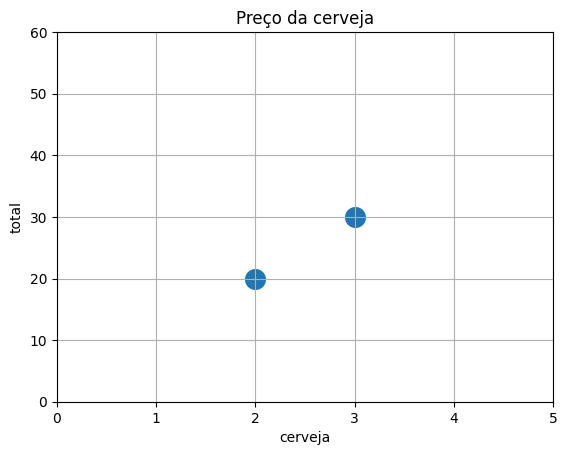

In [ ]:
df.plot(
    kind='scatter',
    x='cerveja',
    y='total',
    ylim=[0,60],
    xlim=[0,5],
    grid=True,
    s=200,
    title='Preço da cerveja'
);

In [ ]:
df

,cerveja,total
0,2,20
1,3,30


In [ ]:
atributo = df['cerveja'].to_frame()
rotulo = df['total'].to_frame()
atributo

,cerveja
0,2
1,3


In [ ]:
rotulo

,total
0,20
1,30


In [ ]:
from sklearn.linear_model import LinearRegression
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [ ]:
modelo = LinearRegression()
modelo

LinearRegression()

In [ ]:
modelo.fit(atributo, rotulo)

LinearRegression()

In [ ]:
novos_dados = pd.DataFrame({
  'cerveja': [1,4,5]
})
novos_dados

,cerveja
0,1
1,4
2,5


In [ ]:
modelo.predict(novos_dados)

array([[10.],
       [40.],
       [50.]])

In [ ]:
novos_dados['total'] = modelo.predict(novos_dados)
novos_dados

,cerveja,total
0,1,10.0
1,4,40.0
2,5,50.0


In [ ]:
linha = pd.concat([df, novos_dados])
linha

,cerveja,total
0,2,20.0
1,3,30.0
0,1,10.0
1,4,40.0
2,5,50.0


In [ ]:
modelo.coef_, modelo.intercept_.round(2)

(array([[10.]]), array([0.]))

''

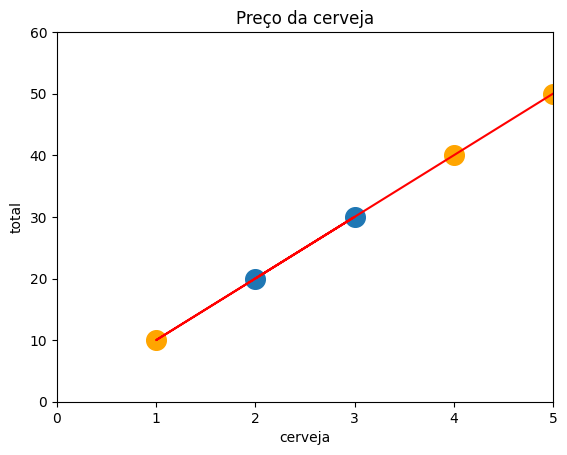

In [ ]:
import matplotlib.pyplot as plt
df.plot(
    kind='scatter',
    x='cerveja',
    y='total',
    ylim=[0,60],
    xlim=[0,5],
    grid=True,
    s=200,
    title='Preço da cerveja'
)
novos_dados.plot(
    kind='scatter',
    x='cerveja',
    y='total',
    ax=plt.gca(),
    c='orange',
    s=200
)
plt.plot(linha['cerveja'], linha['total'], c='red')
;

# Correlação

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)

df = pd.DataFrame({
    'aleatoria': np.random.randint(0,100, 11),
    'forte_negativa': np.arange(0,11)[::-1],
    'cerveja': np.arange(0,11),
    'total': np.arange(0,11) * 10
})
df

,aleatoria,forte_negativa,cerveja,total
0,44,10,0,0
1,47,9,1,10
2,64,8,2,20
3,67,7,3,30
4,67,6,4,40
5,9,5,5,50
6,83,4,6,60
7,21,3,7,70
8,36,2,8,80
9,87,1,9,90


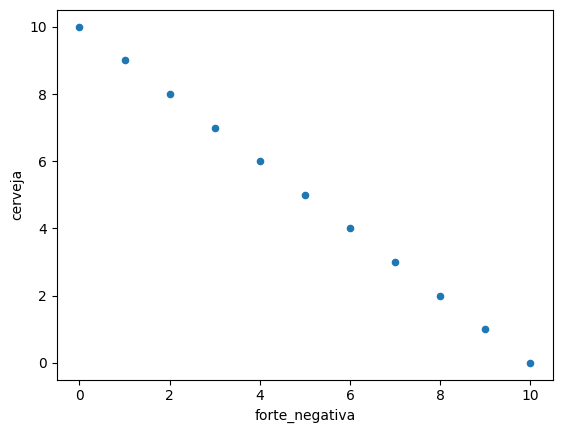

In [ ]:
df.plot(
    kind='scatter',
    x='forte_negativa',
    y='cerveja'
);

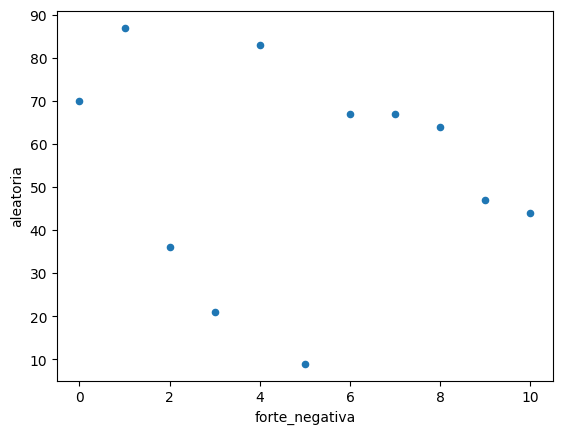

In [ ]:
df.plot(
    kind='scatter',
    x='forte_negativa',
    y='aleatoria'
);

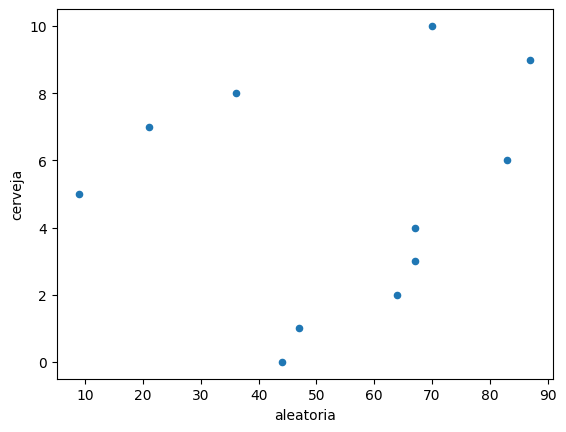

In [ ]:
df.plot(
    kind='scatter',
    x='aleatoria',
    y='cerveja'
);

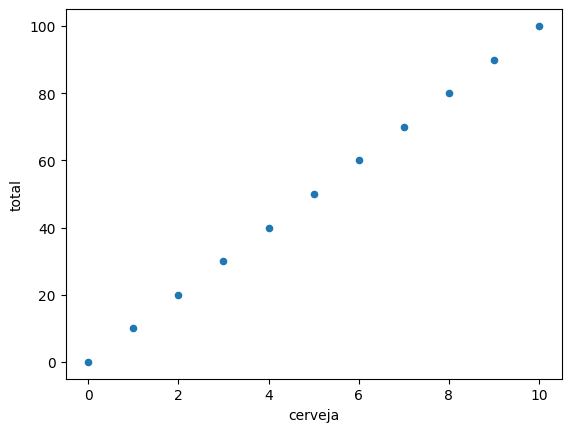

In [ ]:
df.plot(
    kind='scatter',
    x='cerveja',
    y='total'
);

In [ ]:
df.cov()

,aleatoria,forte_negativa,cerveja,total
aleatoria,621.090909,-13.0,13.0,130.0
forte_negativa,-13.000000,11.0,-11.0,-110.0
cerveja,13.000000,-11.0,11.0,110.0
total,130.000000,-110.0,110.0,1100.0


In [ ]:
help(df.corr)

Help on method corr in module pandas.core.frame:

corr(method: 'str | Callable[[np.ndarray, np.ndarray], float]' = 'pearson', min_periods: 'int' = 1, numeric_only: 'bool | lib.NoDefault' = <no_default>) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:
    
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior.
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid resul

In [ ]:
df.corr()

,aleatoria,forte_negativa,cerveja,total
aleatoria,1.000000,-0.157279,0.157279,0.157279
forte_negativa,-0.157279,1.000000,-1.000000,-1.000000
cerveja,0.157279,-1.000000,1.000000,1.000000
total,0.157279,-1.000000,1.000000,1.000000


''

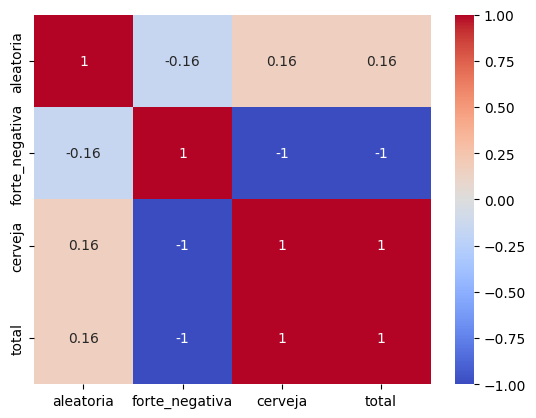

In [ ]:
import seaborn as sns
sns.heatmap(
    df.corr(),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap='coolwarm'
)
;

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({
    'cerveja': [3, 2, 0],
    'agua': [0, 0, 1],
    'hamburguer': [0, 1, 1],
    'total': [30, 40, 25]
})
df

,cerveja,agua,hamburguer,total
0,3,0,0,30
1,2,0,1,40
2,0,1,1,25


In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo

LinearRegression()

In [ ]:
atributos = df.drop('total', axis=1)
atributos

,cerveja,agua,hamburguer
0,3,0,0
1,2,0,1
2,0,1,1


In [ ]:
rotulo = df['total'].to_frame()
rotulo

,total
0,30
1,40
2,25


In [ ]:
modelo.fit(atributos, rotulo) #treinamento
modelo

LinearRegression()

In [ ]:
novos_dados = pd.DataFrame({
    'cerveja':[1, 0, 0],
    'agua':[0,1,0],
    'hamburguer':[0, 0, 1]
})
novos_dados

,cerveja,agua,hamburguer
0,1,0,0
1,0,1,0
2,0,0,1


In [ ]:
modelo.predict(novos_dados)

array([[23.33333333],
       [11.66666667],
       [33.33333333]])

In [ ]:
modelo.coef_

array([[ 3.33333333, -8.33333333, 13.33333333]])

'''
y = a0x0 + a1x1 + a2x2 + b
total = valor_cerveja*qtd_verveja + valor_agua*qtd_agua + valor_hamburguer*qtd_hamburguer + entrada

coeficiente(a) = [valor_cerveja, valor_agua, valor_hamburguer]
constante(b) =  entrada
'''

In [ ]:
modelo.intercept_

array([20.])

In [ ]:
df_modelo = atributos*modelo.coef_
df_modelo

,cerveja,agua,hamburguer
0,10.000000,-0.000000,0.000000
1,6.666667,-0.000000,13.333333
2,0.000000,-8.333333,13.333333


In [ ]:
df_modelo['entrada'] = 20
df_modelo

,cerveja,agua,hamburguer,entrada
0,10.000000,-0.000000,0.000000,20
1,6.666667,-0.000000,13.333333,20
2,0.000000,-8.333333,13.333333,20


In [ ]:
df_modelo.sum(axis=1)

0    30.0
1    40.0
2    25.0
dtype: float64

In [ ]:
df

,cerveja,agua,hamburguer,total
0,3,0,0,30
1,2,0,1,40
2,0,1,1,25


In [ ]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [ ]:
modelo = LinearRegression(fit_intercept=False)

In [ ]:
modelo.fit(atributos, rotulo) #treinamento

LinearRegression(fit_intercept=False)

In [ ]:
modelo.predict(novos_dados)

array([[10.],
       [ 5.],
       [20.]])

In [ ]:
novos_dados

,cerveja,agua,hamburguer
0,1,0,0
1,0,1,0
2,0,0,1


In [ ]:
modelo.coef_

array([[10.,  5., 20.]])

In [ ]:
modelo.intercept_

0.0

In [ ]:
df

,cerveja,agua,hamburguer,total
0,3,0,0,30
1,2,0,1,40
2,0,1,1,25


In [ ]:
df_modelo = atributos*modelo.coef_
df_modelo

,cerveja,agua,hamburguer
0,30.0,0.0,0.0
1,20.0,0.0,20.0
2,0.0,5.0,20.0


In [ ]:
df_modelo.sum(axis=1)

0    30.0
1    40.0
2    25.0
dtype: float64

In [ ]:
rotulo

,total
0,30
1,40
2,25
